#### Disciplina: Aprendizagem de Máquina
#### Período: 2022.1
#### Professor: César Lincoln Cavalcante Mattos
#### Aluno: Ítalo Cavalcante de Abreu - 542406

## Lista 1 - Regressão linear, polinomial e regularização


Instruções
- Com exceção dos casos explicitamente indicados, os algoritmos e modelos devem
ser implementados do início em qualquer linguagem de programação (Python,
R, Octave...).
- Pacotes auxiliares (sklearn, matplotlib, etc) podem ser usados somente para
facilitar a manipulação dos dados e criar grácos.
- A entrega da solução pode ser feita via pdf ou Jupyter notebook pelo SIGAA

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Questão 1

#### Considere o conjunto de dados disponível em articial1d.csv organizado em duas colunas, x e y. Seja um modelo de regressão linear para yˆ = f(x).

In [5]:
dataset = np.genfromtxt('./artificial1d.csv', delimiter=',', skip_header=1)

In [6]:
dataset

array([[-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695],
       [-0.65517241, -0.43115252],
       [-0.5862069 , -0.79475402],
       [-0.51724138, -0.88606806],
       [-0.44827586, -0.89989978],
       [-0.37931034, -0.86184365],
       [-0.31034483, -0.88805183],
       [-0.24137931, -1.23595129],
       [-0.17241379, -0.71956827],
       [-0.10344828, -0.45202286],
       [-0.03448276,  0.09889951],
       [ 0.03448276,  0.34896973],
       [ 0.10344828,  0.09747797],
       [ 0.17241379,  0.70019809],
       [ 0.24137931,  1.31051213],
       [ 0.31034483,  1.00177576],
       [ 0.37931034,  1.00318231],
       [ 0.44827586,  1.14910129],
       [ 0.51724138,  1.59220607],
       [ 0.5862069 ,  0.60909009],
       [ 0.65517241,  0.59441623],
       [ 0.72413793,  0.70300732],
       [ 0.79310345,  0.82332241],
       [ 0.86206897,  1.10646439],
       [ 0.93103448,  1.42295695],
       [ 1.        ,

    a) Apresente os parâmetros do modelo e o MSE (erro quadrático médio) obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote a reta resultante sobre os dados.

In [94]:

# y = X*w
def OLS(X,y):
    
    if(X.ndim <2):
        y_ = y.mean()
        x_ = X.mean()
        
        w1 = np.sum((y-y_)*(X-x_))/np.sum((X-x_)**2)
        w0 = y_- w1*x_
        
        return (w0,w1)
    else:
        XTX = np.dot(X.T,X)
        w = np.dot(np.dot(np.linalg.inv(XTX),X.T), y)
        # ou w = np.dot(np.linalg.pinv(X), y)
        return(w)

In [106]:
x = dataset[:,0];
y = dataset[:,1];
X = np.array([np.full(x.size, 1),x]).T

w = OLS(X, y)

y_pred = w[0] + w[1]*y
# Parametros encontrados
print('[w0 w1]: ', w)

# MSE
print('MSE: ', (1/(2*x.size))* np.sum( ( y - y_pred )**2 )   )

[w0 w1]:  [0.08956111 1.51328267]
MSE:  0.14097007560796895


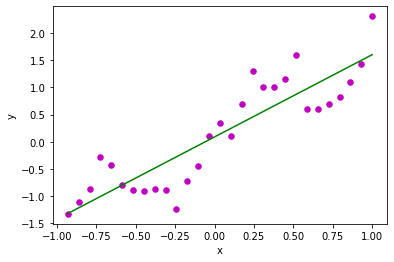

In [96]:
def plot2d(x, y, w):
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    y_pred = w[0] + w[1]*x
 
    plt.plot(x, y_pred, color = "g")
 
    plt.xlabel('x')
    plt.ylabel('y')
 
    plt.show()
    
plot2d(x,y,w)

    b) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados.

In [210]:

def GD(X,y, alpha=0.01, epochs=100):
    N = X.size
    
    #Escolha um valor α positivo e pequeno.
    
    # Inicialize os parametros do modelo na iteracao t = 0.
    w = np.array(np.full(X.shape[1], 1))
    w[0] = 0
    t=0
    
    stop_condition = False
    while not stop_condition:
        t=t+1
        
        w_t=w.copy()
        
        # Calcule os erros do modelo
        y_t = np.dot(X, w_t)
        err_t = y - y_t
        
        # Atualize os parametros
        w = w_t + alpha*(1/N)*np.dot(err_t,X)
        
        
        #print(err_t, '\n\n\n', X, '\n\n\n', np.dot(err_t,X), '\n\n\n', w)
        
        if t>=epochs:
            stop_condition = True
        
    print('error :',err_t)
    return w
    
    
        
    
w2 = GD(X,y, 0.001, 10000)
w2

error : [-0.10151467  0.02214728  0.15607868  0.64727693  0.4034308  -0.05789126
 -0.24692586 -0.35847814 -0.41814257 -0.54207131 -0.98769133 -0.56902887
 -0.39920402  0.05399779  0.20634745 -0.14286486  0.36213469  0.87472818
  0.46827124  0.37195723  0.42015565  0.76553987 -0.31529667 -0.42769109
 -0.41682056 -0.39422603 -0.2088046   0.0099674   0.79912757]


array([0.09376156, 1.41696414])

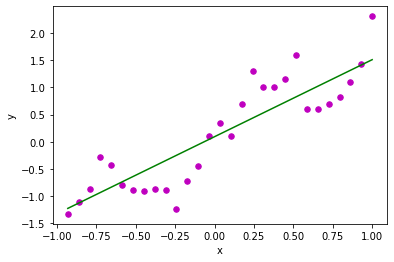

In [211]:
plot2d(x,y,w2)